,id,name,year
0,56338,Papst Paul III. ohne Samtmütze,1543.0
1,24108,Papst Paul III. und seine Enkel,1546.0
2,112109,Papst Paul IV.,1549.0
3,112099,Papst Pius IV.,1549.0
6,57533,Papst Silvester I.,1648.0
...,...,...,...
101455,151741,Schutzmantelmadonna,1462.0
101456,333739,Schutzmantelmadonna,1480.0
101464,278641,Schwäbisch Hall: Sankt Michael: Kruzifix,1494.0
101474,268499,Schwanenordenskasel C 13,1453.0


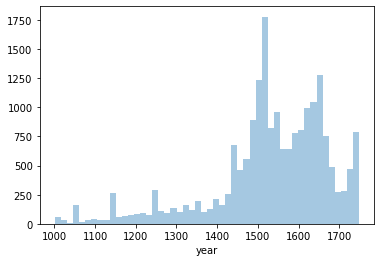

In [2]:
# import required libraries, make sure to install them with pip before
import pandas as pd
import glob
import json
import seaborn as sns

# read the data from the JSON files
data = []
for filename in glob.glob('artworks/*.json'):
    with open(filename) as file:
        try:
            data += json.loads(file.read())['records']
        except json.JSONDecodeError:
            pass

# extract only id, name and the year
clean = []
for e in data:
    result = [e['id'], e['name']]
    if len(e['datings']):
        result.append(e['datings'][0]['year'])
    clean.append(result)
#display(clean)

# create the pandas dataframe
df = pd.DataFrame(clean)
df.columns = ['id', 'name', 'year']

# limit data to a year range
df = df[(df['year'] > 1000) & (df['year'] < 1750)]
display(df)

# plot the distribution
sns.distplot(df['year'], kde=False)